In [1]:
# importing necessary libraries and modules
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option("display.max_columns",None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# setting directory name where we have the raw files (i.e. input folder)
import os
for dirname,_,filenames in os.walk("input"):
    for filename in filenames:
# Listing out available files that we have inside the "data" folder
        print(os.path.join(dirname,filename))

input\CICIDS2017.csv


In [2]:
# data loading
df=pd.read_csv("input/CICIDS2017.csv")

In [3]:
# displaying the first 5 lines
df.head()

Unnamed: 0   Destination Port   Flow Duration   Total Fwd Packets  \
0           0                389       113095465                  48   
1           1                389       113473706                  68   
2           2                  0       119945515                 150   
3           3                443        60261928                   9   
4           4                 53             269                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       24                         9668   
1                       40                        11364   
2                        0                            0   
3                        7                         2330   
4                        2                          102   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                         10012                     403   
1                         12718                     403   
2                             0                       0   
3                          4221                    1093   
4                           322                      51   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       0               201.416667              203.548293   
1                       0               167.117647              171.919413   
2                       0                 0.000000                0.000000   
3                       0               258.888889              409.702161   
4                      51                51.000000                0.000000   

   Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean  \
0                    923                     316               417.166667   
1                   1139                     126               317.950000   
2                      0                       0                 0.000000   
3                   1460                       0               603.000000   
4                    161                     161               161.000000   

    Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
0              231.080951  1.740123e+02         0.636630    1.592894e+06   
1              208.261294  2.122254e+02         0.951762    1.060502e+06   
2                0.000000  0.000000e+00         1.250568    8.050035e+05   
3              653.594166  1.087088e+02         0.265508    4.017462e+06   
4                0.000000  1.576208e+06     14869.888480    8.966667e+01   

    Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean  \
0   4.597265e+06       16500000              3      113000000   2.406286e+06   
1   3.813685e+06       16500000              2      113000000   1.693637e+06   
2   5.277837e+06       60100000              0      120000000   8.050035e+05   
3   1.550000e+07       60000000              1       60300000   7.532741e+06   
4   1.483790e+02            261              4              4   4.000000e+00   

    Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
0  5.491986e+06      16500000             3      113000000    4917177.522   
1  4.719143e+06      16500000             2      113000000    2908399.744   
2  5.277837e+06      60100000             0              0          0.000   
3  2.120000e+07      60000000           311         211947      35324.500   
4  0.000000e+00             4             4              4          4.000   

    Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags  \
0  7.084368e+06      16500000             3              1               0   
1  5.922355e+06      16500000             3              1               0   
2  0.000000e+00             0             0              0               0   
3  2.750433e+04         57109            48              0               0   
4  0.000000e+00             4             4              0               0   

    Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bw

In [4]:
# displaying the shape of the data (no.of rows and columns)
df.shape

(455143, 80)

In [5]:
# removing the 'Unnamed/empty' row & column 
df=df.drop(labels='Unnamed: 0',axis=1)

In [6]:
#Count after removing 'Unnamed/empty' row & column
df.shape

(455143, 79)

In [7]:
# view data from the input file
print(df.columns.tolist())

[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag 

In [8]:
# checking the null value counts in each feature
for feature in df.columns.tolist():
    print('{:<30} -> {} null values'.format(feature, df[feature].isnull().sum()),'\n')

 Destination Port              -> 0 null values 

 Flow Duration                 -> 0 null values 

 Total Fwd Packets             -> 0 null values 

 Total Backward Packets        -> 0 null values 

Total Length of Fwd Packets    -> 0 null values 

 Total Length of Bwd Packets   -> 0 null values 

 Fwd Packet Length Max         -> 0 null values 

 Fwd Packet Length Min         -> 0 null values 

 Fwd Packet Length Mean        -> 0 null values 

 Fwd Packet Length Std         -> 0 null values 

Bwd Packet Length Max          -> 0 null values 

 Bwd Packet Length Min         -> 0 null values 

 Bwd Packet Length Mean        -> 0 null values 

 Bwd Packet Length Std         -> 0 null values 

Flow Bytes/s                   -> 20 null values 

 Flow Packets/s                -> 0 null values 

 Flow IAT Mean                 -> 0 null values 

 Flow IAT Std                  -> 0 null values 

 Flow IAT Max                  -> 0 null values 

 Flow IAT Min                  -> 0 null values 


In [9]:
df.shape

(455143, 79)

In [10]:
# checking the infinity values in each feature
for feature in df.columns.tolist():
    print('{:<30} -> {} infinity values'.format(feature, df[feature].isin([np.inf, -np.inf]).sum()),'\n')

 Destination Port              -> 0 infinity values 

 Flow Duration                 -> 0 infinity values 

 Total Fwd Packets             -> 0 infinity values 

 Total Backward Packets        -> 0 infinity values 

Total Length of Fwd Packets    -> 0 infinity values 

 Total Length of Bwd Packets   -> 0 infinity values 

 Fwd Packet Length Max         -> 0 infinity values 

 Fwd Packet Length Min         -> 0 infinity values 

 Fwd Packet Length Mean        -> 0 infinity values 

 Fwd Packet Length Std         -> 0 infinity values 

Bwd Packet Length Max          -> 0 infinity values 

 Bwd Packet Length Min         -> 0 infinity values 

 Bwd Packet Length Mean        -> 0 infinity values 

 Bwd Packet Length Std         -> 0 infinity values 

Flow Bytes/s                   -> 243 infinity values 

 Flow Packets/s                -> 263 infinity values 

 Flow IAT Mean                 -> 0 infinity values 

 Flow IAT Std                  -> 0 infinity values 

 Flow IAT Max           

In [11]:
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0                389       113095465                  48   
1                389       113473706                  68   
2                  0       119945515                 150   
3                443        60261928                   9   
4                 53             269                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       24                         9668   
1                       40                        11364   
2                        0                            0   
3                        7                         2330   
4                        2                          102   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                         10012                     403   
1                         12718                     403   
2                             0                       0   
3                          4221                    1093   
4                           322                      51   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       0               201.416667              203.548293   
1                       0               167.117647              171.919413   
2                       0                 0.000000                0.000000   
3                       0               258.888889              409.702161   
4                      51                51.000000                0.000000   

   Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean  \
0                    923                     316               417.166667   
1                   1139                     126               317.950000   
2                      0                       0                 0.000000   
3                   1460                       0               603.000000   
4                    161                     161               161.000000   

    Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
0              231.080951  1.740123e+02         0.636630    1.592894e+06   
1              208.261294  2.122254e+02         0.951762    1.060502e+06   
2                0.000000  0.000000e+00         1.250568    8.050035e+05   
3              653.594166  1.087088e+02         0.265508    4.017462e+06   
4                0.000000  1.576208e+06     14869.888480    8.966667e+01   

    Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean  \
0   4.597265e+06       16500000              3      113000000   2.406286e+06   
1   3.813685e+06       16500000              2      113000000   1.693637e+06   
2   5.277837e+06       60100000              0      120000000   8.050035e+05   
3   1.550000e+07       60000000              1       60300000   7.532741e+06   
4   1.483790e+02            261              4              4   4.000000e+00   

    Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
0  5.491986e+06      16500000             3      113000000    4917177.522   
1  4.719143e+06      16500000             2      113000000    2908399.744   
2  5.277837e+06      60100000             0              0          0.000   
3  2.120000e+07      60000000           311         211947      35324.500   
4  0.000000e+00             4             4              4          4.000   

    Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags  \
0  7.084368e+06      16500000             3              1               0   
1  5.922355e+06      16500000             3              1               0   
2  0.000000e+00             0             0              0               0   
3  2.750433e+04         57109            48              0               0   
4  0.000000e+00             4             4              0               0   

    Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  \
0               0               0                1536 

In [12]:
'''Replace any positive infinity (np.inf) or negative infinity (-np.inf) values in the DataFrame with NaN (Not a Number) values .
and then .dropna() removes any rows (or columns) with missing values (NaN) '''
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

z_threshold = 3
z_scores = stats.zscore(df.drop(labels='Label',axis=1))
outliers = (abs(z_scores) > z_threshold).any(axis=1)
df = df[~outliers]

## Threshold for identifying outliers. A common practice is to consider data points with z-scores greater than 3 (or less than -3) as outliers. 
##This is because, in a normal distribution, about 99.7% of data points fall within 3 standard deviations from the mean 
##(according to the empirical rule or 68-95-99.7 rule).

In [13]:
df.shape

(332035, 79)

In [14]:
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
4                  53             269                   2   
5                 123           30352                   1   
8                  53           23527                   1   
9                  53           23978                   2   
12                137         3378994                 205   

     Total Backward Packets  Total Length of Fwd Packets  \
4                         2                          102   
5                         1                           48   
8                         1                           34   
9                         2                           46   
12                        0                        13760   

     Total Length of Bwd Packets   Fwd Packet Length Max  \
4                            322                      51   
5                             48                      48   
8                            109                      34   
9                            196                      23   
12                             0                      68   

     Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
4                       51                51.000000                 0.00000   
5                       48                48.000000                 0.00000   
8                       34                34.000000                 0.00000   
9                       23                23.000000                 0.00000   
12                      50                67.121951                 3.88685   

    Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean  \
4                     161                     161                    161.0   
5                      48                      48                     48.0   
8                     109                     109                    109.0   
9                      98                      98                     98.0   
12                      0                       0                      0.0   

     Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
4                      0.0  1.576208e+06     14869.888480       89.666667   
5                      0.0  3.162889e+03        65.893516    30352.000000   
8                      0.0  6.078123e+03        85.008713    23527.000000   
9                      0.0  1.009258e+04       166.819585     7992.666667   
12                     0.0  4.072218e+03        60.668945    16563.696080   

     Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean  \
4      148.379019            261              4              4        4.00000   
5        0.000000          30352          30352              0        0.00000   
8        0.000000          23527          23527              0        0.00000   
9    13836.776550          23970              4              4        4.00000   
12  166333.522100        1780399              1        3378994    16563.69608   

     Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
4         0.0000             4             4              4            4.0   
5         0.0000             0             0              0            0.0   
8         0.0000             0             0              0            0.0   
9         0.0000             4             4              4            4.0   
12   166333.5221       1780399             1              0            0.0   

     Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags  \
4            0.0             4             4              0               0   
5            0.0             0             0              0               0   
8            0.0             0             0              0               0   
9            0.0             4             4              0               0   
12           0.0             0             0              0               0   

     Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  \


In [15]:
df.describe()

Destination Port   Flow Duration   Total Fwd Packets  \
count      332035.000000    3.320350e+05       332035.000000   
mean         2836.577057    1.537420e+06            2.560378   
std          6386.782831    5.156720e+06            6.301508   
min             1.000000    5.000000e+00            1.000000   
25%            80.000000    4.900000e+01            1.000000   
50%            80.000000    2.000000e+02            1.000000   
75%          2492.000000    5.041200e+05            3.000000   
max         48479.000000    7.104255e+07         1155.000000   

        Total Backward Packets  Total Length of Fwd Packets  \
count            332035.000000                332035.000000   
mean                  2.162950                    59.678386   
std                   8.205028                   229.029143   
min                   0.000000                     0.000000   
25%                   1.000000                     2.000000   
50%                   1.000000                    24.000000   
75%                   2.000000                    42.000000   
max                1394.000000                 14263.000000   

        Total Length of Bwd Packets   Fwd Packet Length Max  \
count                  3.320350e+05           332035.000000   
mean                   2.174029e+03               29.295927   
std                    1.551632e+04               82.649195   
min                    0.000000e+00                0.000000   
25%                    6.000000e+00                2.000000   
50%                    6.000000e+00                6.000000   
75%                    1.940000e+02               27.000000   
max                    2.905933e+06              943.000000   

        Fwd Packet Length Min   Fwd Packet Length Mean  \
count           332035.000000            332035.000000   
mean                 9.948653                14.593020   
std                 16.629743                22.289921   
min                  0.000000                 0.000000   
25%                  0.000000                 2.000000   
50%                  2.000000                 6.000000   
75%                  6.000000                22.000000   
max                 68.000000               205.200000   

        Fwd Packet Length Std  Bwd Packet Length Max   Bwd Packet Length Min  \
count           332035.000000          332035.000000           332035.000000   
mean                 7.559751             957.777126               22.633159   
std                 31.243277            2236.502190               41.354699   
min                  0.000000               0.000000                0.000000   
25%                  0.000000               6.000000                0.000000   
50%                  0.000000               6.000000                6.000000   
75%                  0.000000             113.000000                6.000000   
max                286.818584           10220.000000              181.000000   

        Bwd Packet Length Mean   Bwd Packet Length Std  Flow Bytes/s  \
count            332035.000000           332035.000000  3.320350e+05   
mean                354.554211              415.642018  1.980749e+05   
std                 776.592801             1011.218974  3.916274e+05   
min                   0.000000                0.000000  0.000000e+00   
25%                   6.000000                0.000000  4.329330e+03   
50%                   6.000000                0.000000  9.836066e+04   
75%                 111.000000                0.000000  1.777778e+05   
max                2901.750000             4455.182578  2.480000e+07   

        Flow Packets/s   Flow IAT Mean   Flow IAT Std   Flow IAT Max  \
count    332035.000000    3.320350e+05   3.320350e+05   3.320350e+05   
mean      24610.110019    3.095918e+05   5.844369e+05   1.213179e+06   
std       34251.991127    7.891755e+05   1.443415e+06   2.860973e+06   
min           0.151345    2.416667e+00   0.000000e+00   3.000000e+00   
25%          15.059674    4.900000e+01   0

In [16]:
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
4                  53             269                   2   
5                 123           30352                   1   
8                  53           23527                   1   
9                  53           23978                   2   
12                137         3378994                 205   

     Total Backward Packets  Total Length of Fwd Packets  \
4                         2                          102   
5                         1                           48   
8                         1                           34   
9                         2                           46   
12                        0                        13760   

     Total Length of Bwd Packets   Fwd Packet Length Max  \
4                            322                      51   
5                             48                      48   
8                            109                      34   
9                            196                      23   
12                             0                      68   

     Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
4                       51                51.000000                 0.00000   
5                       48                48.000000                 0.00000   
8                       34                34.000000                 0.00000   
9                       23                23.000000                 0.00000   
12                      50                67.121951                 3.88685   

    Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean  \
4                     161                     161                    161.0   
5                      48                      48                     48.0   
8                     109                     109                    109.0   
9                      98                      98                     98.0   
12                      0                       0                      0.0   

     Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
4                      0.0  1.576208e+06     14869.888480       89.666667   
5                      0.0  3.162889e+03        65.893516    30352.000000   
8                      0.0  6.078123e+03        85.008713    23527.000000   
9                      0.0  1.009258e+04       166.819585     7992.666667   
12                     0.0  4.072218e+03        60.668945    16563.696080   

     Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean  \
4      148.379019            261              4              4        4.00000   
5        0.000000          30352          30352              0        0.00000   
8        0.000000          23527          23527              0        0.00000   
9    13836.776550          23970              4              4        4.00000   
12  166333.522100        1780399              1        3378994    16563.69608   

     Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
4         0.0000             4             4              4            4.0   
5         0.0000             0             0              0            0.0   
8         0.0000             0             0              0            0.0   
9         0.0000             4             4              4            4.0   
12   166333.5221       1780399             1              0            0.0   

     Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags  \
4            0.0             4             4              0               0   
5            0.0             0             0              0               0   
8            0.0             0             0              0               0   
9            0.0             4             4              0               0   
12           0.0             0             0              0               0   

     Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  \


In [17]:
# checking unique targets in the label feature
class_labels=df['Label'].unique().tolist()
class_labels.sort()
print(class_labels)

['BENIGN', 'DDoS', 'PortScan']


In [18]:
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
4                  53             269                   2   
5                 123           30352                   1   
8                  53           23527                   1   
9                  53           23978                   2   
12                137         3378994                 205   

     Total Backward Packets  Total Length of Fwd Packets  \
4                         2                          102   
5                         1                           48   
8                         1                           34   
9                         2                           46   
12                        0                        13760   

     Total Length of Bwd Packets   Fwd Packet Length Max  \
4                            322                      51   
5                             48                      48   
8                            109                      34   
9                            196                      23   
12                             0                      68   

     Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
4                       51                51.000000                 0.00000   
5                       48                48.000000                 0.00000   
8                       34                34.000000                 0.00000   
9                       23                23.000000                 0.00000   
12                      50                67.121951                 3.88685   

    Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean  \
4                     161                     161                    161.0   
5                      48                      48                     48.0   
8                     109                     109                    109.0   
9                      98                      98                     98.0   
12                      0                       0                      0.0   

     Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
4                      0.0  1.576208e+06     14869.888480       89.666667   
5                      0.0  3.162889e+03        65.893516    30352.000000   
8                      0.0  6.078123e+03        85.008713    23527.000000   
9                      0.0  1.009258e+04       166.819585     7992.666667   
12                     0.0  4.072218e+03        60.668945    16563.696080   

     Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean  \
4      148.379019            261              4              4        4.00000   
5        0.000000          30352          30352              0        0.00000   
8        0.000000          23527          23527              0        0.00000   
9    13836.776550          23970              4              4        4.00000   
12  166333.522100        1780399              1        3378994    16563.69608   

     Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
4         0.0000             4             4              4            4.0   
5         0.0000             0             0              0            0.0   
8         0.0000             0             0              0            0.0   
9         0.0000             4             4              4            4.0   
12   166333.5221       1780399             1              0            0.0   

     Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags  \
4            0.0             4             4              0               0   
5            0.0             0             0              0               0   
8            0.0             0             0              0               0   
9            0.0             4             4              0               0   
12           0.0             0             0              0               0   

     Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  \


In [19]:
# checking the samples in each target
df['Label'].value_counts()

Label
PortScan    146565
BENIGN       93126
DDoS         92344
Name: count, dtype: int64

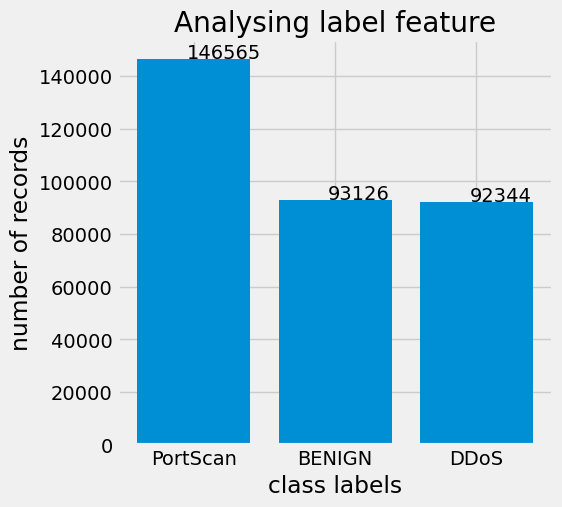

In [20]:
# generated a bar-chart to get collect meaningful information from the label feature
chart_data=list(dict(df['Label'].value_counts()).values())
chart_labels=list(dict(df['Label'].value_counts()).keys())
with plt.style.context(style='fivethirtyeight'):
    fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5))
    ax.bar(x=chart_labels,
           height=chart_data)
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+50))
    ax.set_title(label='Analysing label feature')
    ax.set_xlabel(xlabel='class labels')
    ax.set_ylabel(ylabel='number of records')
    plt.show()

In [21]:
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
4                  53             269                   2   
5                 123           30352                   1   
8                  53           23527                   1   
9                  53           23978                   2   
12                137         3378994                 205   

     Total Backward Packets  Total Length of Fwd Packets  \
4                         2                          102   
5                         1                           48   
8                         1                           34   
9                         2                           46   
12                        0                        13760   

     Total Length of Bwd Packets   Fwd Packet Length Max  \
4                            322                      51   
5                             48                      48   
8                            109                      34   
9                            196                      23   
12                             0                      68   

     Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
4                       51                51.000000                 0.00000   
5                       48                48.000000                 0.00000   
8                       34                34.000000                 0.00000   
9                       23                23.000000                 0.00000   
12                      50                67.121951                 3.88685   

    Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean  \
4                     161                     161                    161.0   
5                      48                      48                     48.0   
8                     109                     109                    109.0   
9                      98                      98                     98.0   
12                      0                       0                      0.0   

     Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
4                      0.0  1.576208e+06     14869.888480       89.666667   
5                      0.0  3.162889e+03        65.893516    30352.000000   
8                      0.0  6.078123e+03        85.008713    23527.000000   
9                      0.0  1.009258e+04       166.819585     7992.666667   
12                     0.0  4.072218e+03        60.668945    16563.696080   

     Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean  \
4      148.379019            261              4              4        4.00000   
5        0.000000          30352          30352              0        0.00000   
8        0.000000          23527          23527              0        0.00000   
9    13836.776550          23970              4              4        4.00000   
12  166333.522100        1780399              1        3378994    16563.69608   

     Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
4         0.0000             4             4              4            4.0   
5         0.0000             0             0              0            0.0   
8         0.0000             0             0              0            0.0   
9         0.0000             4             4              4            4.0   
12   166333.5221       1780399             1              0            0.0   

     Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags  \
4            0.0             4             4              0               0   
5            0.0             0             0              0               0   
8            0.0             0             0              0               0   
9            0.0             4             4              0               0   
12           0.0             0             0              0               0   

     Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  \


In [22]:
# creating a dictionary with unique targets to perform label encoding
class_dict={}
for idx,label in enumerate(class_labels):
    class_dict[label]=idx
print(class_dict)

{'BENIGN': 0, 'DDoS': 1, 'PortScan': 2}


In [23]:
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
4                  53             269                   2   
5                 123           30352                   1   
8                  53           23527                   1   
9                  53           23978                   2   
12                137         3378994                 205   

     Total Backward Packets  Total Length of Fwd Packets  \
4                         2                          102   
5                         1                           48   
8                         1                           34   
9                         2                           46   
12                        0                        13760   

     Total Length of Bwd Packets   Fwd Packet Length Max  \
4                            322                      51   
5                             48                      48   
8                            109                      34   
9                            196                      23   
12                             0                      68   

     Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
4                       51                51.000000                 0.00000   
5                       48                48.000000                 0.00000   
8                       34                34.000000                 0.00000   
9                       23                23.000000                 0.00000   
12                      50                67.121951                 3.88685   

    Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean  \
4                     161                     161                    161.0   
5                      48                      48                     48.0   
8                     109                     109                    109.0   
9                      98                      98                     98.0   
12                      0                       0                      0.0   

     Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
4                      0.0  1.576208e+06     14869.888480       89.666667   
5                      0.0  3.162889e+03        65.893516    30352.000000   
8                      0.0  6.078123e+03        85.008713    23527.000000   
9                      0.0  1.009258e+04       166.819585     7992.666667   
12                     0.0  4.072218e+03        60.668945    16563.696080   

     Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean  \
4      148.379019            261              4              4        4.00000   
5        0.000000          30352          30352              0        0.00000   
8        0.000000          23527          23527              0        0.00000   
9    13836.776550          23970              4              4        4.00000   
12  166333.522100        1780399              1        3378994    16563.69608   

     Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
4         0.0000             4             4              4            4.0   
5         0.0000             0             0              0            0.0   
8         0.0000             0             0              0            0.0   
9         0.0000             4             4              4            4.0   
12   166333.5221       1780399             1              0            0.0   

     Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags  \
4            0.0             4             4              0               0   
5            0.0             0             0              0               0   
8            0.0             0             0              0               0   
9            0.0             4             4              0               0   
12           0.0             0             0              0               0   

     Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  \


In [24]:
# performing label encoding on Label feature
df['class']=df['Label'].map(class_dict)
df=df.drop(labels='Label',axis=1)
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
4                  53             269                   2   
5                 123           30352                   1   
8                  53           23527                   1   
9                  53           23978                   2   
12                137         3378994                 205   

     Total Backward Packets  Total Length of Fwd Packets  \
4                         2                          102   
5                         1                           48   
8                         1                           34   
9                         2                           46   
12                        0                        13760   

     Total Length of Bwd Packets   Fwd Packet Length Max  \
4                            322                      51   
5                             48                      48   
8                            109                      34   
9                            196                      23   
12                             0                      68   

     Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
4                       51                51.000000                 0.00000   
5                       48                48.000000                 0.00000   
8                       34                34.000000                 0.00000   
9                       23                23.000000                 0.00000   
12                      50                67.121951                 3.88685   

    Bwd Packet Length Max   Bwd Packet Length Min   Bwd Packet Length Mean  \
4                     161                     161                    161.0   
5                      48                      48                     48.0   
8                     109                     109                    109.0   
9                      98                      98                     98.0   
12                      0                       0                      0.0   

     Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
4                      0.0  1.576208e+06     14869.888480       89.666667   
5                      0.0  3.162889e+03        65.893516    30352.000000   
8                      0.0  6.078123e+03        85.008713    23527.000000   
9                      0.0  1.009258e+04       166.819585     7992.666667   
12                     0.0  4.072218e+03        60.668945    16563.696080   

     Flow IAT Std   Flow IAT Max   Flow IAT Min  Fwd IAT Total   Fwd IAT Mean  \
4      148.379019            261              4              4        4.00000   
5        0.000000          30352          30352              0        0.00000   
8        0.000000          23527          23527              0        0.00000   
9    13836.776550          23970              4              4        4.00000   
12  166333.522100        1780399              1        3378994    16563.69608   

     Fwd IAT Std   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
4         0.0000             4             4              4            4.0   
5         0.0000             0             0              0            0.0   
8         0.0000             0             0              0            0.0   
9         0.0000             4             4              4            4.0   
12   166333.5221       1780399             1              0            0.0   

     Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags   Bwd PSH Flags  \
4            0.0             4             4              0               0   
5            0.0             0             0              0               0   
8            0.0             0             0              0               0   
9            0.0             4             4              0               0   
12           0.0             0             0              0               0   

     Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  \


In [25]:
#feature selection
'''Corrwith in panda library is used for computing the correlation coefficients between each feature and a target variable.'''

target_feature = 'class'
all_features = df.columns.tolist()
all_features.remove(target_feature)
corr = df[all_features].corrwith(df[target_feature])
sorted_features = corr.abs().sort_values(ascending=False).index.tolist()
selected_features = sorted_features[:30]
filtered_df = df[[target_feature] + selected_features]

In [26]:
filtered_df.head()

class   Avg Fwd Segment Size   Fwd Packet Length Mean   PSH Flag Count  \
4       0              51.000000                51.000000                0   
5       0              48.000000                48.000000                0   
8       0              34.000000                34.000000                0   
9       0              23.000000                23.000000                0   
12      0              67.121951                67.121951                0   

     Fwd Packet Length Min   Min Packet Length   Bwd Packet Length Min  \
4                       51                  51                     161   
5                       48                  48                      48   
8                       34                  34                     109   
9                       23                  23                      98   
12                      50                  50                       0   

     Bwd Packets/s   Flow Packets/s  Fwd Packets/s  Init_Win_bytes_forward  \
4      7434.944238     14869.888480    7434.944238                      -1   
5        32.946758        65.893516      32.946758                      -1   
8        42.504357        85.008713      42.504357                      -1   
9        83.409792       166.819585      83.409792                      -1   
12        0.000000        60.668945      60.668945                      -1   

     Fwd Packet Length Max   Destination Port   min_seg_size_forward  \
4                       51                 53                     32   
5                       48                123                     32   
8                       34                 53                     32   
9                       23                 53                     32   
12                      68                137                     14   

    Total Length of Fwd Packets   Subflow Fwd Bytes   Fwd Packet Length Std  \
4                           102                 102                 0.00000   
5                            48                  48                 0.00000   
8                            34                  34                 0.00000   
9                            46                  46                 0.00000   
12                        13760               13760                 3.88685   

     act_data_pkt_fwd   Down/Up Ratio   Total Fwd Packets  \
4                   1               1                   2   
5                   0               1                   1   
8                   0               1                   1   
9                   1               1                   2   
12                204               0                 205   

    Subflow Fwd Packets   Bwd IAT Max   Flow Duration   Flow IAT Max  \
4                     2             4             269            261   
5                     1             0           30352          30352   
8                     1             0           23527          23527   
9                     2             4           23978          23970   
12                  205             0         3378994        1780399   

    Flow Bytes/s   ACK Flag Count  Fwd IAT Total   Bwd IAT Std  \
4   1.576208e+06                0              4           0.0   
5   3.162889e+03                0              0           0.0   
8   6.078123e+03                0              0           0.0   
9   1.009258e+04                0              4           0.0   
12  4.072218e+03                0        3378994           0.0   

     Average Packet Size   Fwd IAT Max   Fwd Header Length.1  
4             118.750000             4                    64  
5              72.000000             0                    32  
8              88.500000             0                    32  
9              66.250000             4                    64  
12             67.453659       1780399                  3572

In [27]:
print(filtered_df.columns.tolist())

['class', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' PSH Flag Count', ' Fwd Packet Length Min', ' Min Packet Length', ' Bwd Packet Length Min', ' Bwd Packets/s', ' Flow Packets/s', 'Fwd Packets/s', 'Init_Win_bytes_forward', ' Fwd Packet Length Max', ' Destination Port', ' min_seg_size_forward', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Fwd Packet Length Std', ' act_data_pkt_fwd', ' Down/Up Ratio', ' Total Fwd Packets', 'Subflow Fwd Packets', ' Bwd IAT Max', ' Flow Duration', ' Flow IAT Max', 'Flow Bytes/s', ' ACK Flag Count', 'Fwd IAT Total', ' Bwd IAT Std', ' Average Packet Size', ' Fwd IAT Max', ' Fwd Header Length.1']


In [28]:
#performing data normalization using minmaxscaler
'''The MinMaxScaler works by scaling the data such that all feature values are within a specified range, 
typically between 0 and 1.'''

scaler=MinMaxScaler()
scaler=scaler.fit(filtered_df.drop(labels='class',axis=1))
scaled_df=scaler.transform(filtered_df.drop(labels='class',axis=1))
data=pd.DataFrame(data=scaled_df,columns=filtered_df.drop(labels='class',axis=1).columns)
data['class']=filtered_df['class'].values
data.head()

Avg Fwd Segment Size   Fwd Packet Length Mean   PSH Flag Count  \
0               0.248538                 0.248538              0.0   
1               0.233918                 0.233918              0.0   
2               0.165692                 0.165692              0.0   
3               0.112086                 0.112086              0.0   
4               0.327105                 0.327105              0.0   

    Fwd Packet Length Min   Min Packet Length   Bwd Packet Length Min  \
0                0.750000            0.772727                0.889503   
1                0.705882            0.727273                0.265193   
2                0.500000            0.515152                0.602210   
3                0.338235            0.348485                0.541436   
4                0.735294            0.757576                0.000000   

    Bwd Packets/s   Flow Packets/s  Fwd Packets/s  Init_Win_bytes_forward  \
0        0.052045         0.033171       0.016585                     0.0   
1        0.000231         0.000147       0.000073                     0.0   
2        0.000298         0.000189       0.000095                     0.0   
3        0.000584         0.000372       0.000186                     0.0   
4        0.000000         0.000135       0.000135                     0.0   

    Fwd Packet Length Max   Destination Port   min_seg_size_forward  \
0                0.054083           0.001073               0.529412   
1                0.050901           0.002517               0.529412   
2                0.036055           0.001073               0.529412   
3                0.024390           0.001073               0.529412   
4                0.072110           0.002805               0.000000   

   Total Length of Fwd Packets   Subflow Fwd Bytes   Fwd Packet Length Std  \
0                     0.007151            0.007151                0.000000   
1                     0.003365            0.003365                0.000000   
2                     0.002384            0.002384                0.000000   
3                     0.003225            0.003225                0.000000   
4                     0.964734            0.964734                0.013552   

    act_data_pkt_fwd   Down/Up Ratio   Total Fwd Packets  Subflow Fwd Packets  \
0           0.001111             0.5            0.000867             0.000867   
1           0.000000             0.5            0.000000             0.000000   
2           0.000000             0.5            0.000000             0.000000   
3           0.001111             0.5            0.000867             0.000867   
4           0.226667             0.0            0.176776             0.176776   

    Bwd IAT Max   Flow Duration   Flow IAT Max  Flow Bytes/s   ACK Flag Count  \
0  1.687764e-07        0.000004       0.000004      0.063557              0.0   
1  0.000000e+00        0.000427       0.000505      0.000128              0.0   
2  0.000000e+00        0.000331       0.000391      0.000245              0.0   
3  1.687764e-07        0.000337       0.000399      0.000407              0.0   
4  0.000000e+00        0.047563       0.029624      0.000164              0.0   

   Fwd IAT Total   Bwd IAT Std   Average Packet Size   Fwd IAT Max  \
0   5.633803e-08           0.0              0.071493  6.655574e-08   
1   0.000000e+00           0.0              0.043347  0.000000e+00   
2   0.000000e+00           0.0              0.053281  0.000000e+00   
3   5.633803e-08           0.0              0.039886  6.655574e-08   
4   4.759146e-02           0.0              0.040610  2.962394e-02   

    Fwd Header Length.1  class  
0              0.001129      0  
1              0.000308      0  
2              0.000308      0  
3              0.001129      0  
4              0.091114      0

In [29]:
# saving the trained scaler algorithm
import pickle
with open(file="models/Scaler.pkl",mode='wb') as file:
    pickle.dump(obj=scaler,file=file)

In [30]:
imp_cols=data.columns.tolist()
imp_cols=[str(col).strip() for col in imp_cols]
print(imp_cols)

['Avg Fwd Segment Size', 'Fwd Packet Length Mean', 'PSH Flag Count', 'Fwd Packet Length Min', 'Min Packet Length', 'Bwd Packet Length Min', 'Bwd Packets/s', 'Flow Packets/s', 'Fwd Packets/s', 'Init_Win_bytes_forward', 'Fwd Packet Length Max', 'Destination Port', 'min_seg_size_forward', 'Total Length of Fwd Packets', 'Subflow Fwd Bytes', 'Fwd Packet Length Std', 'act_data_pkt_fwd', 'Down/Up Ratio', 'Total Fwd Packets', 'Subflow Fwd Packets', 'Bwd IAT Max', 'Flow Duration', 'Flow IAT Max', 'Flow Bytes/s', 'ACK Flag Count', 'Fwd IAT Total', 'Bwd IAT Std', 'Average Packet Size', 'Fwd IAT Max', 'Fwd Header Length.1', 'class']


In [31]:
data.columns=imp_cols
data.head()

Avg Fwd Segment Size  Fwd Packet Length Mean  PSH Flag Count  \
0              0.248538                0.248538             0.0   
1              0.233918                0.233918             0.0   
2              0.165692                0.165692             0.0   
3              0.112086                0.112086             0.0   
4              0.327105                0.327105             0.0   

   Fwd Packet Length Min  Min Packet Length  Bwd Packet Length Min  \
0               0.750000           0.772727               0.889503   
1               0.705882           0.727273               0.265193   
2               0.500000           0.515152               0.602210   
3               0.338235           0.348485               0.541436   
4               0.735294           0.757576               0.000000   

   Bwd Packets/s  Flow Packets/s  Fwd Packets/s  Init_Win_bytes_forward  \
0       0.052045        0.033171       0.016585                     0.0   
1       0.000231        0.000147       0.000073                     0.0   
2       0.000298        0.000189       0.000095                     0.0   
3       0.000584        0.000372       0.000186                     0.0   
4       0.000000        0.000135       0.000135                     0.0   

   Fwd Packet Length Max  Destination Port  min_seg_size_forward  \
0               0.054083          0.001073              0.529412   
1               0.050901          0.002517              0.529412   
2               0.036055          0.001073              0.529412   
3               0.024390          0.001073              0.529412   
4               0.072110          0.002805              0.000000   

   Total Length of Fwd Packets  Subflow Fwd Bytes  Fwd Packet Length Std  \
0                     0.007151           0.007151               0.000000   
1                     0.003365           0.003365               0.000000   
2                     0.002384           0.002384               0.000000   
3                     0.003225           0.003225               0.000000   
4                     0.964734           0.964734               0.013552   

   act_data_pkt_fwd  Down/Up Ratio  Total Fwd Packets  Subflow Fwd Packets  \
0          0.001111            0.5           0.000867             0.000867   
1          0.000000            0.5           0.000000             0.000000   
2          0.000000            0.5           0.000000             0.000000   
3          0.001111            0.5           0.000867             0.000867   
4          0.226667            0.0           0.176776             0.176776   

    Bwd IAT Max  Flow Duration  Flow IAT Max  Flow Bytes/s  ACK Flag Count  \
0  1.687764e-07       0.000004      0.000004      0.063557             0.0   
1  0.000000e+00       0.000427      0.000505      0.000128             0.0   
2  0.000000e+00       0.000331      0.000391      0.000245             0.0   
3  1.687764e-07       0.000337      0.000399      0.000407             0.0   
4  0.000000e+00       0.047563      0.029624      0.000164             0.0   

   Fwd IAT Total  Bwd IAT Std  Average Packet Size   Fwd IAT Max  \
0   5.633803e-08          0.0             0.071493  6.655574e-08   
1   0.000000e+00          0.0             0.043347  0.000000e+00   
2   0.000000e+00          0.0             0.053281  0.000000e+00   
3   5.633803e-08          0.0             0.039886  6.655574e-08   
4   4.759146e-02          0.0             0.040610  2.962394e-02   

   Fwd Header Length.1  class  
0             0.001129      0  
1             0.000308      0  
2             0.000308      0  
3             0.001129      0  
4             0.091114      0

In [32]:
# saving the important columns list as text file
with open(file='Important_Columns.txt',mode='w') as file:
    for item in imp_cols[:-1]:
        file.write(str(item)+'\n')

In [33]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [34]:
X.head()

Avg Fwd Segment Size  Fwd Packet Length Mean  PSH Flag Count  \
0              0.248538                0.248538             0.0   
1              0.233918                0.233918             0.0   
2              0.165692                0.165692             0.0   
3              0.112086                0.112086             0.0   
4              0.327105                0.327105             0.0   

   Fwd Packet Length Min  Min Packet Length  Bwd Packet Length Min  \
0               0.750000           0.772727               0.889503   
1               0.705882           0.727273               0.265193   
2               0.500000           0.515152               0.602210   
3               0.338235           0.348485               0.541436   
4               0.735294           0.757576               0.000000   

   Bwd Packets/s  Flow Packets/s  Fwd Packets/s  Init_Win_bytes_forward  \
0       0.052045        0.033171       0.016585                     0.0   
1       0.000231        0.000147       0.000073                     0.0   
2       0.000298        0.000189       0.000095                     0.0   
3       0.000584        0.000372       0.000186                     0.0   
4       0.000000        0.000135       0.000135                     0.0   

   Fwd Packet Length Max  Destination Port  min_seg_size_forward  \
0               0.054083          0.001073              0.529412   
1               0.050901          0.002517              0.529412   
2               0.036055          0.001073              0.529412   
3               0.024390          0.001073              0.529412   
4               0.072110          0.002805              0.000000   

   Total Length of Fwd Packets  Subflow Fwd Bytes  Fwd Packet Length Std  \
0                     0.007151           0.007151               0.000000   
1                     0.003365           0.003365               0.000000   
2                     0.002384           0.002384               0.000000   
3                     0.003225           0.003225               0.000000   
4                     0.964734           0.964734               0.013552   

   act_data_pkt_fwd  Down/Up Ratio  Total Fwd Packets  Subflow Fwd Packets  \
0          0.001111            0.5           0.000867             0.000867   
1          0.000000            0.5           0.000000             0.000000   
2          0.000000            0.5           0.000000             0.000000   
3          0.001111            0.5           0.000867             0.000867   
4          0.226667            0.0           0.176776             0.176776   

    Bwd IAT Max  Flow Duration  Flow IAT Max  Flow Bytes/s  ACK Flag Count  \
0  1.687764e-07       0.000004      0.000004      0.063557             0.0   
1  0.000000e+00       0.000427      0.000505      0.000128             0.0   
2  0.000000e+00       0.000331      0.000391      0.000245             0.0   
3  1.687764e-07       0.000337      0.000399      0.000407             0.0   
4  0.000000e+00       0.047563      0.029624      0.000164             0.0   

   Fwd IAT Total  Bwd IAT Std  Average Packet Size   Fwd IAT Max  \
0   5.633803e-08          0.0             0.071493  6.655574e-08   
1   0.000000e+00          0.0             0.043347  0.000000e+00   
2   0.000000e+00          0.0             0.053281  0.000000e+00   
3   5.633803e-08          0.0             0.039886  6.655574e-08   
4   4.759146e-02          0.0             0.040610  2.962394e-02   

   Fwd Header Length.1  
0             0.001129  
1             0.000308  
2             0.000308  
3             0.001129  
4             0.091114

In [35]:
y.head()

class
0      0
1      0
2      0
3      0
4      0

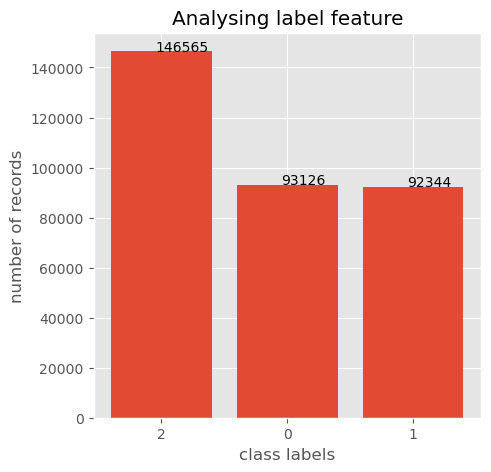

In [36]:
# visualizing bar-chart after data balancing
chart_data=list(dict(data['class'].value_counts()).values())
chart_labels=list(dict(data['class'].value_counts()).keys())
chart_labels=[str(item) for item in chart_labels]
with plt.style.context(style='ggplot'):
    fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5))
    ax.bar(x=chart_labels,
           height=chart_data)
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+50))
    ax.set_title(label='Analysing label feature')
    ax.set_xlabel(xlabel='class labels')
    ax.set_ylabel(ylabel='number of records')
    plt.show()

In [37]:
data.shape

(332035, 31)

In [38]:
data_0=data.loc[data['class']==0][:50000]
data_1=data.loc[data['class']==1][:50000]
data_2=data.loc[data['class']==2][:50000]

data=pd.concat(objs=[data_0,data_1,data_2],ignore_index=True)
data.shape

(150000, 31)

In [39]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [40]:
X.head()

Avg Fwd Segment Size  Fwd Packet Length Mean  PSH Flag Count  \
0              0.248538                0.248538             0.0   
1              0.233918                0.233918             0.0   
2              0.165692                0.165692             0.0   
3              0.112086                0.112086             0.0   
4              0.327105                0.327105             0.0   

   Fwd Packet Length Min  Min Packet Length  Bwd Packet Length Min  \
0               0.750000           0.772727               0.889503   
1               0.705882           0.727273               0.265193   
2               0.500000           0.515152               0.602210   
3               0.338235           0.348485               0.541436   
4               0.735294           0.757576               0.000000   

   Bwd Packets/s  Flow Packets/s  Fwd Packets/s  Init_Win_bytes_forward  \
0       0.052045        0.033171       0.016585                     0.0   
1       0.000231        0.000147       0.000073                     0.0   
2       0.000298        0.000189       0.000095                     0.0   
3       0.000584        0.000372       0.000186                     0.0   
4       0.000000        0.000135       0.000135                     0.0   

   Fwd Packet Length Max  Destination Port  min_seg_size_forward  \
0               0.054083          0.001073              0.529412   
1               0.050901          0.002517              0.529412   
2               0.036055          0.001073              0.529412   
3               0.024390          0.001073              0.529412   
4               0.072110          0.002805              0.000000   

   Total Length of Fwd Packets  Subflow Fwd Bytes  Fwd Packet Length Std  \
0                     0.007151           0.007151               0.000000   
1                     0.003365           0.003365               0.000000   
2                     0.002384           0.002384               0.000000   
3                     0.003225           0.003225               0.000000   
4                     0.964734           0.964734               0.013552   

   act_data_pkt_fwd  Down/Up Ratio  Total Fwd Packets  Subflow Fwd Packets  \
0          0.001111            0.5           0.000867             0.000867   
1          0.000000            0.5           0.000000             0.000000   
2          0.000000            0.5           0.000000             0.000000   
3          0.001111            0.5           0.000867             0.000867   
4          0.226667            0.0           0.176776             0.176776   

    Bwd IAT Max  Flow Duration  Flow IAT Max  Flow Bytes/s  ACK Flag Count  \
0  1.687764e-07       0.000004      0.000004      0.063557             0.0   
1  0.000000e+00       0.000427      0.000505      0.000128             0.0   
2  0.000000e+00       0.000331      0.000391      0.000245             0.0   
3  1.687764e-07       0.000337      0.000399      0.000407             0.0   
4  0.000000e+00       0.047563      0.029624      0.000164             0.0   

   Fwd IAT Total  Bwd IAT Std  Average Packet Size   Fwd IAT Max  \
0   5.633803e-08          0.0             0.071493  6.655574e-08   
1   0.000000e+00          0.0             0.043347  0.000000e+00   
2   0.000000e+00          0.0             0.053281  0.000000e+00   
3   5.633803e-08          0.0             0.039886  6.655574e-08   
4   4.759146e-02          0.0             0.040610  2.962394e-02   

   Fwd Header Length.1  
0             0.001129  
1             0.000308  
2             0.000308  
3             0.001129  
4             0.091114

In [41]:
y.head()

class
0      0
1      0
2      0
3      0
4      0

In [42]:
# Data splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120000, 30) (30000, 30) (120000, 1) (30000, 1)


In [43]:
# saving the splitted data
X_train.to_csv("splitted_data/X_train.csv",index=False)
X_test.to_csv("splitted_data/X_test.csv",index=False)
y_train.to_csv("splitted_data/y_train.csv",index=False)
y_test.to_csv("splitted_data/y_test.csv",index=False)

---